# **<font color="black">Проект_Фитнес</font>**</font>

# **<font color="black">Предсказание оттока посетителей фитнес-центра</font>**</font>

## **<font color="black">Описание проекта</font>**:</font>  

В Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с пользователями на основе аналитических данных.  

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов.  

Как понять, что пользователь больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт.  

Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.  

Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.  

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.  

Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество анкет пользователей. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.  

## **<font color="black">Задачи</font>**:</font>

•	научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;  

•	сформировать типичные портреты пользователей: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;  

•	проанализировать основные признаки, наиболее сильно влияющие на отток;  

•	сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:  

1) выделить целевые группы клиентов;  
2) предложить меры по снижению оттока;  
3) определить другие особенности взаимодействия с клиентами.  

# **<font color="black">План работы по проекту</font>**:</font>  

1. [Предварительная работа с данными](#start)  

1.1.   [Загрузка библиотек, датафреймов, приведение данных к нужным форматам](#start1)  
 
1.2.   [Предообработка данных](#start2)  
 
1.3.   [Выводы по предварительной работе с данными](#start3)  
 
 
 2. [Исследовательский анализ данных (EDA)](#start4)  

2.1. [Средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуемся методом groupby()](#start5)  

  
2.2. [Столбчатые гистограммы и гистограммы распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток); Матрица корреляций.](#start6)      

  
  3. [Построим модель прогнозирования оттока пользователей:](#start7)    
 
 
  4. [Кластеризацию пользователей](#start8)     


  5. [Выводы и базовые рекомендации по работе с клиентами](#start9)

<a id="start"></a>
# 1. Предварительная работа с данными

<a id="start1"></a>
# 1.1. Загрузка библиотек, датафреймов, приведение данных к нужным форматам:

In [1]:
import pandas as pd
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
%matplotlib inline

# для полного отображения содержимого столбцов
pd.set_option('display.max_colwidth', -1)
# импорт sklearn и ее методов/алгоритмов
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

Загрузим датафрейм:  

In [2]:
path = '/datasets/gym_churn.csv'
data = pd.read_csv(path)

Посмотрим на датафрейм:  

In [3]:
display(data.head())

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Посмотрим сводную информацию о датафрейме:    

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


Посмотрим на размер датафрейма:

In [5]:
print('Размер датафрейма: (строк:столбцов) {}'.format(data.shape))

Размер датафрейма: (строк:столбцов) (4000, 14)


<a id="start2"></a>
# 1.2. Предообработка данных:

Проверим на дубликаты:  

In [6]:
print(data.duplicated().sum())

0


Удалим возможные пробелы, методом "strip":  

In [7]:
data[['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Contract_period', 'Group_visits', 'Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month', 'Churn']] = data[['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Contract_period', 'Group_visits', 'Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month', 'Churn']].applymap(lambda x: x.strip() if isinstance(x, str) else x)

Проверим на дубликаты:  

In [8]:
print(data.duplicated().sum())

0


Перемеинуем, для удобства, столбцы по-русски.  

In [9]:
data.rename(columns={'gender':'пол', 'Near_Location':'район', 'Partner':'партнер', 'Promo_friends':'промо_код', 'Phone':'телефон', 'Contract_period': 'длит_абонемента', 'Group_visits':'групповые_занятия', 'Age':'возраст', 'Avg_additional_charges_total':'кросс_продажи_сумма', 'Month_to_end_contract':'срок_оконч_абонемента', 'Lifetime':'срок_с_перв_обращения', 'Avg_class_frequency_total':'сред_част_посещений_неделя_всего', 'Avg_class_frequency_current_month':'сред_част_посещений_неделя_месяц', 'Churn':'отток_месяц'},inplace=True)

In [10]:
display(data.head())

,пол,район,партнер,промо_код,телефон,длит_абонемента,групповые_занятия,возраст,кросс_продажи_сумма,срок_оконч_абонемента,срок_с_перв_обращения,сред_част_посещений_неделя_всего,сред_част_посещений_неделя_месяц,отток_месяц
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Транспонируем - поменяем оси датафрейма и воспользуемся методом describe():    

In [11]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
пол,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
район,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
партнер,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
промо_код,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
телефон,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
длит_абонемента,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
групповые_занятия,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
возраст,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
кросс_продажи_сумма,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
срок_оконч_абонемента,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


<a id="start3"></a>
# 1.3. Выводы по предварительной работе с данными:

В работу пришел датафрейм, содержащий 14 столбцов и 4000 строк.  

Пропусков нет, тип данных правильный, дубликатов не обнаружено.   

Мужчин и женщин в фитнес-центре, примерно, одинаковое количество.  

Большинство посетителей проживает рядом с фитнес-центром - 85%.  

Почти половина клиентов сотрудники компаний-партнеров (корпоративные скидки, компенсации?).  

30 % воспользовались промокодом.  

90 % пользователей оставляют номер телефона.  

Подавлюящее большинство постетилей покупают абонемент на 6 месяцев.  

41% посетителей посещают груповые занятия.  

Средний возраст клиентов 29 лет, самому молодому 18 лет(странно), самому старшему 41 год(очень странно).  

Средняя сумма кросс-продаж составила 146 рублей, максиммальная сумма 552 рубля,  

Среднее количество посещений, примерно, одинаково за все время и текущий месяц(значит, что посещают по какому-то графику, стабильно?),  

Средний отток составляет 26%.  

<a id="start4"></a>
# 2. Исследовательский анализ данных (EDA)

<a id="start5"></a>
# 2.1. Средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуемся методом groupby():

In [12]:
churn_group = data.groupby('отток_месяц').mean()

In [13]:
churn_group = churn_group.transpose()

In [14]:
display(churn_group)

отток_месяц,0,1
пол,0.510037,0.510839
район,0.873086,0.768143
партнер,0.534195,0.355325
промо_код,0.353522,0.183789
телефон,0.903709,0.902922
длит_абонемента,5.747193,1.728558
групповые_занятия,0.464103,0.268615
возраст,29.976523,26.989632
кросс_продажи_сумма,158.445715,115.082899
срок_оконч_абонемента,5.283089,1.662582


Выводы:  
    
Наиболее лояльными к фитнес-центру "Культурист-датасаентист" оказались клиенты, имеющие следущие признаки:  
    
- проживающие рядом,

- являющиеся сотрудниками компаний-партнеров,  

- пришел по промокоду,  

- занимается около 4 месяцев,  

- посещает групповые занятия,  

- по возрасту - ближе к 30,  

- склонен немного, но немного больше, чем в среднем, тратить на дополнительные услуги,  

- до конца абонемента остается, примерно, пол-года - покупает абонемент на длительный срок, сразу,  

- регулярно - 2 раза в неделю занимается  

<a id="start6"></a>
# 2.2. Столбчатые гистограммы и гистограммы распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток); Матрица корреляций:

In [15]:
churn_group = churn_group.transpose() # еще раз транспонируем таблицу

In [16]:
display(churn_group)

,пол,район,партнер,промо_код,телефон,длит_абонемента,групповые_занятия,возраст,кросс_продажи_сумма,срок_оконч_абонемента,срок_с_перв_обращения,сред_част_посещений_неделя_всего,сред_част_посещений_неделя_месяц
отток_месяц,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


In [17]:
# делим каждый признак на сумму признаков  так как их всего 2 в колонке, то на сумму 
# максимального и минимального значения из столбца,
for column in churn_group:
    churn_group[column] = (churn_group[column] / (churn_group[column].max()+churn_group[column].min()))

In [18]:
# транспонируем группированную таблицу и переименовываем столбцы
churn_group_new = churn_group.transpose()
churn_group_new.columns = ['остался', 'ушел']

In [19]:
churn_group_new

,остался,ушел
пол,0.499607,0.500393
район,0.531971,0.468029
партнер,0.600543,0.399457
промо_код,0.657947,0.342053
телефон,0.500218,0.499782
длит_абонемента,0.768778,0.231222
групповые_занятия,0.633400,0.366600
возраст,0.526216,0.473784
кросс_продажи_сумма,0.579266,0.420734
срок_оконч_абонемента,0.760630,0.239370


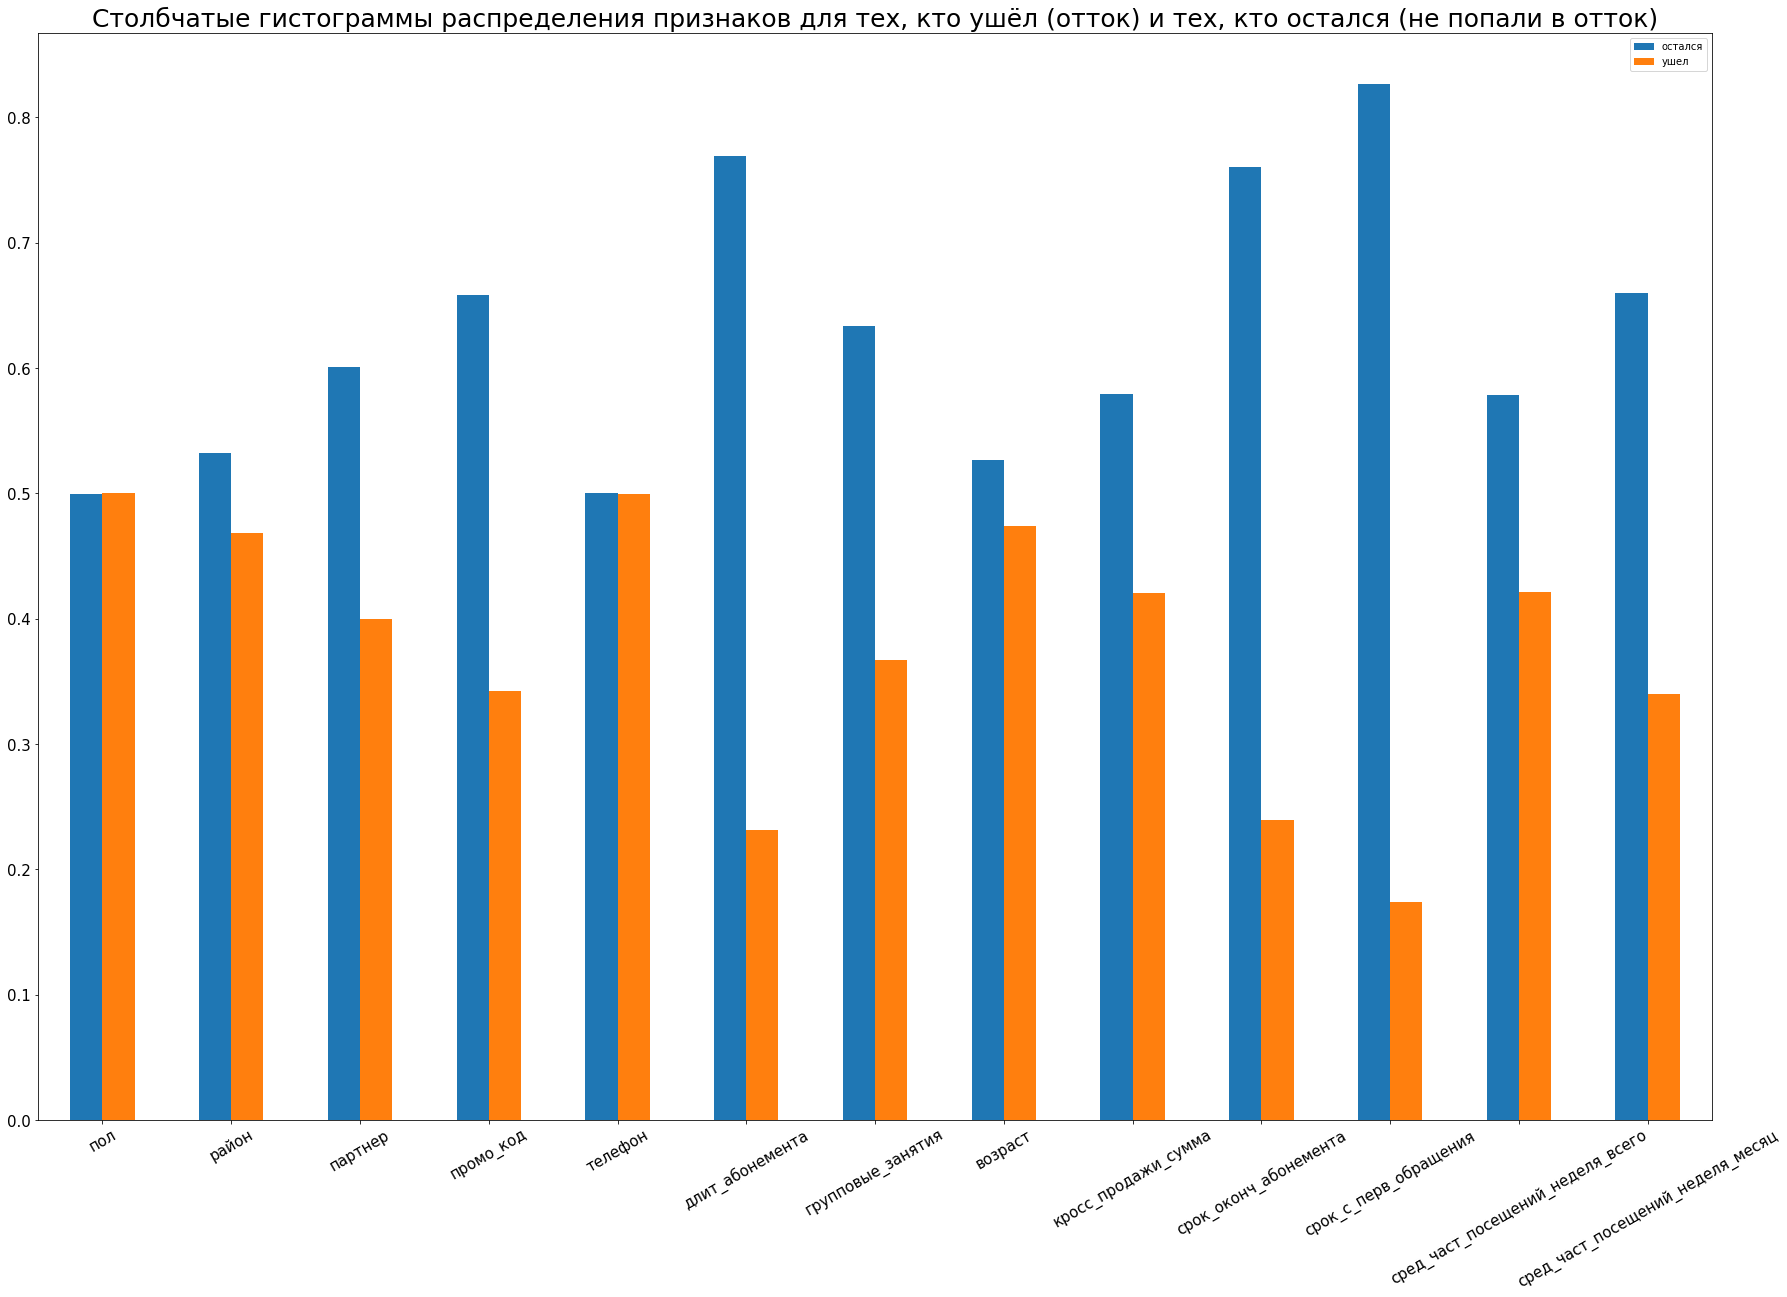

In [20]:
# строим столбчатую диаграмму
churn_group_new.plot(kind='bar',figsize=(30, 20), fontsize=15)
plt.title('Столбчатые гистограммы распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)', fontsize=25)
plt.xticks(rotation = 30);

Построим, также графиком distplot:  

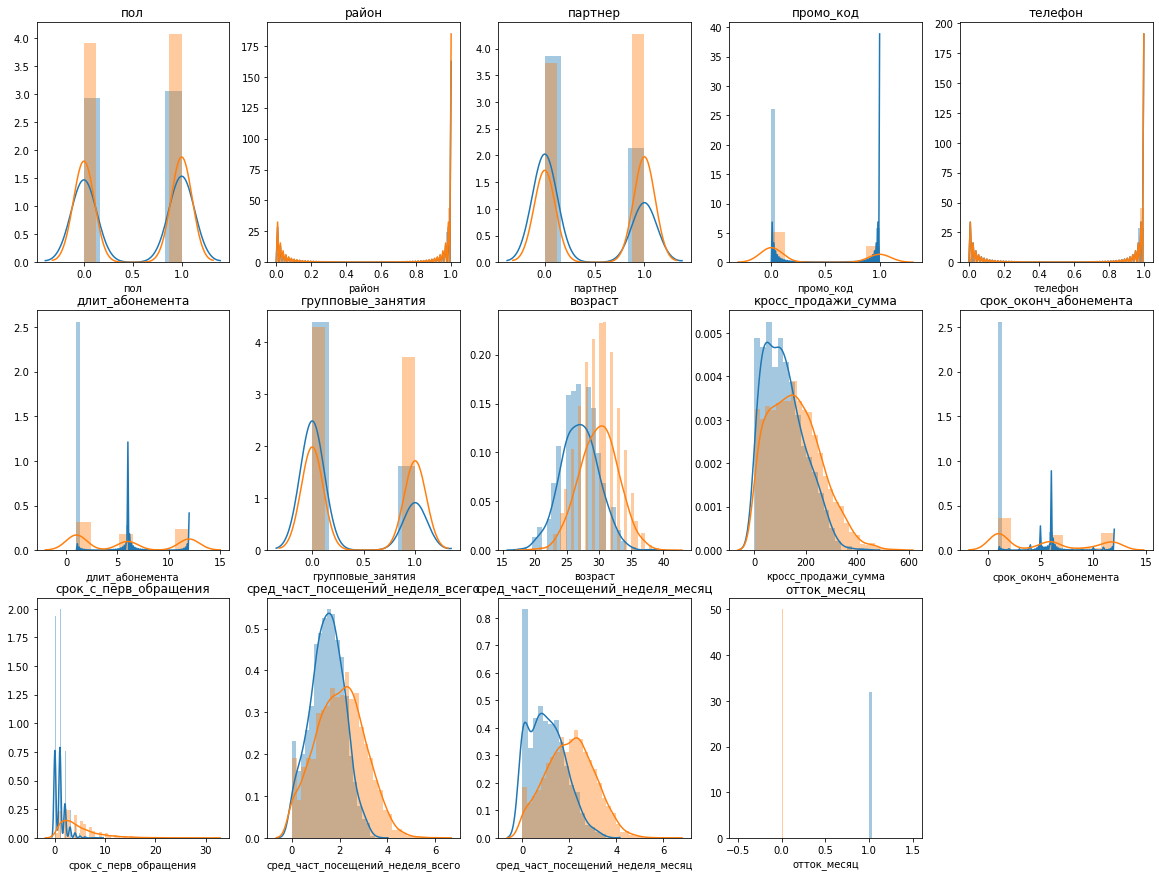

In [21]:
plt.subplots(figsize=(20, 15))
plots_in_row = 5

for i, col in enumerate(data.columns.values):
    sns.distplot(data.query('отток_месяц == 1')[col], ax = plt.subplot(len(data.columns.values)//plots_in_row + 1, plots_in_row, i + 1))
    sns.distplot(data.query('отток_месяц == 0')[col])
    plt.title(col)

<font color="DarkBlue">ОК! Учту!</font> 

Гистограмма распределения признаков для оставшихся (лояльных) клиентов:  

In [22]:
data_loyal = data[data['отток_месяц'] == 0]
display(data_loyal.head(3))

,пол,район,партнер,промо_код,телефон,длит_абонемента,групповые_занятия,возраст,кросс_продажи_сумма,срок_оконч_абонемента,срок_с_перв_обращения,сред_част_посещений_неделя_всего,сред_част_посещений_неделя_месяц,отток_месяц
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0


Парные графики распределения признаков для лояльных клиентов:  

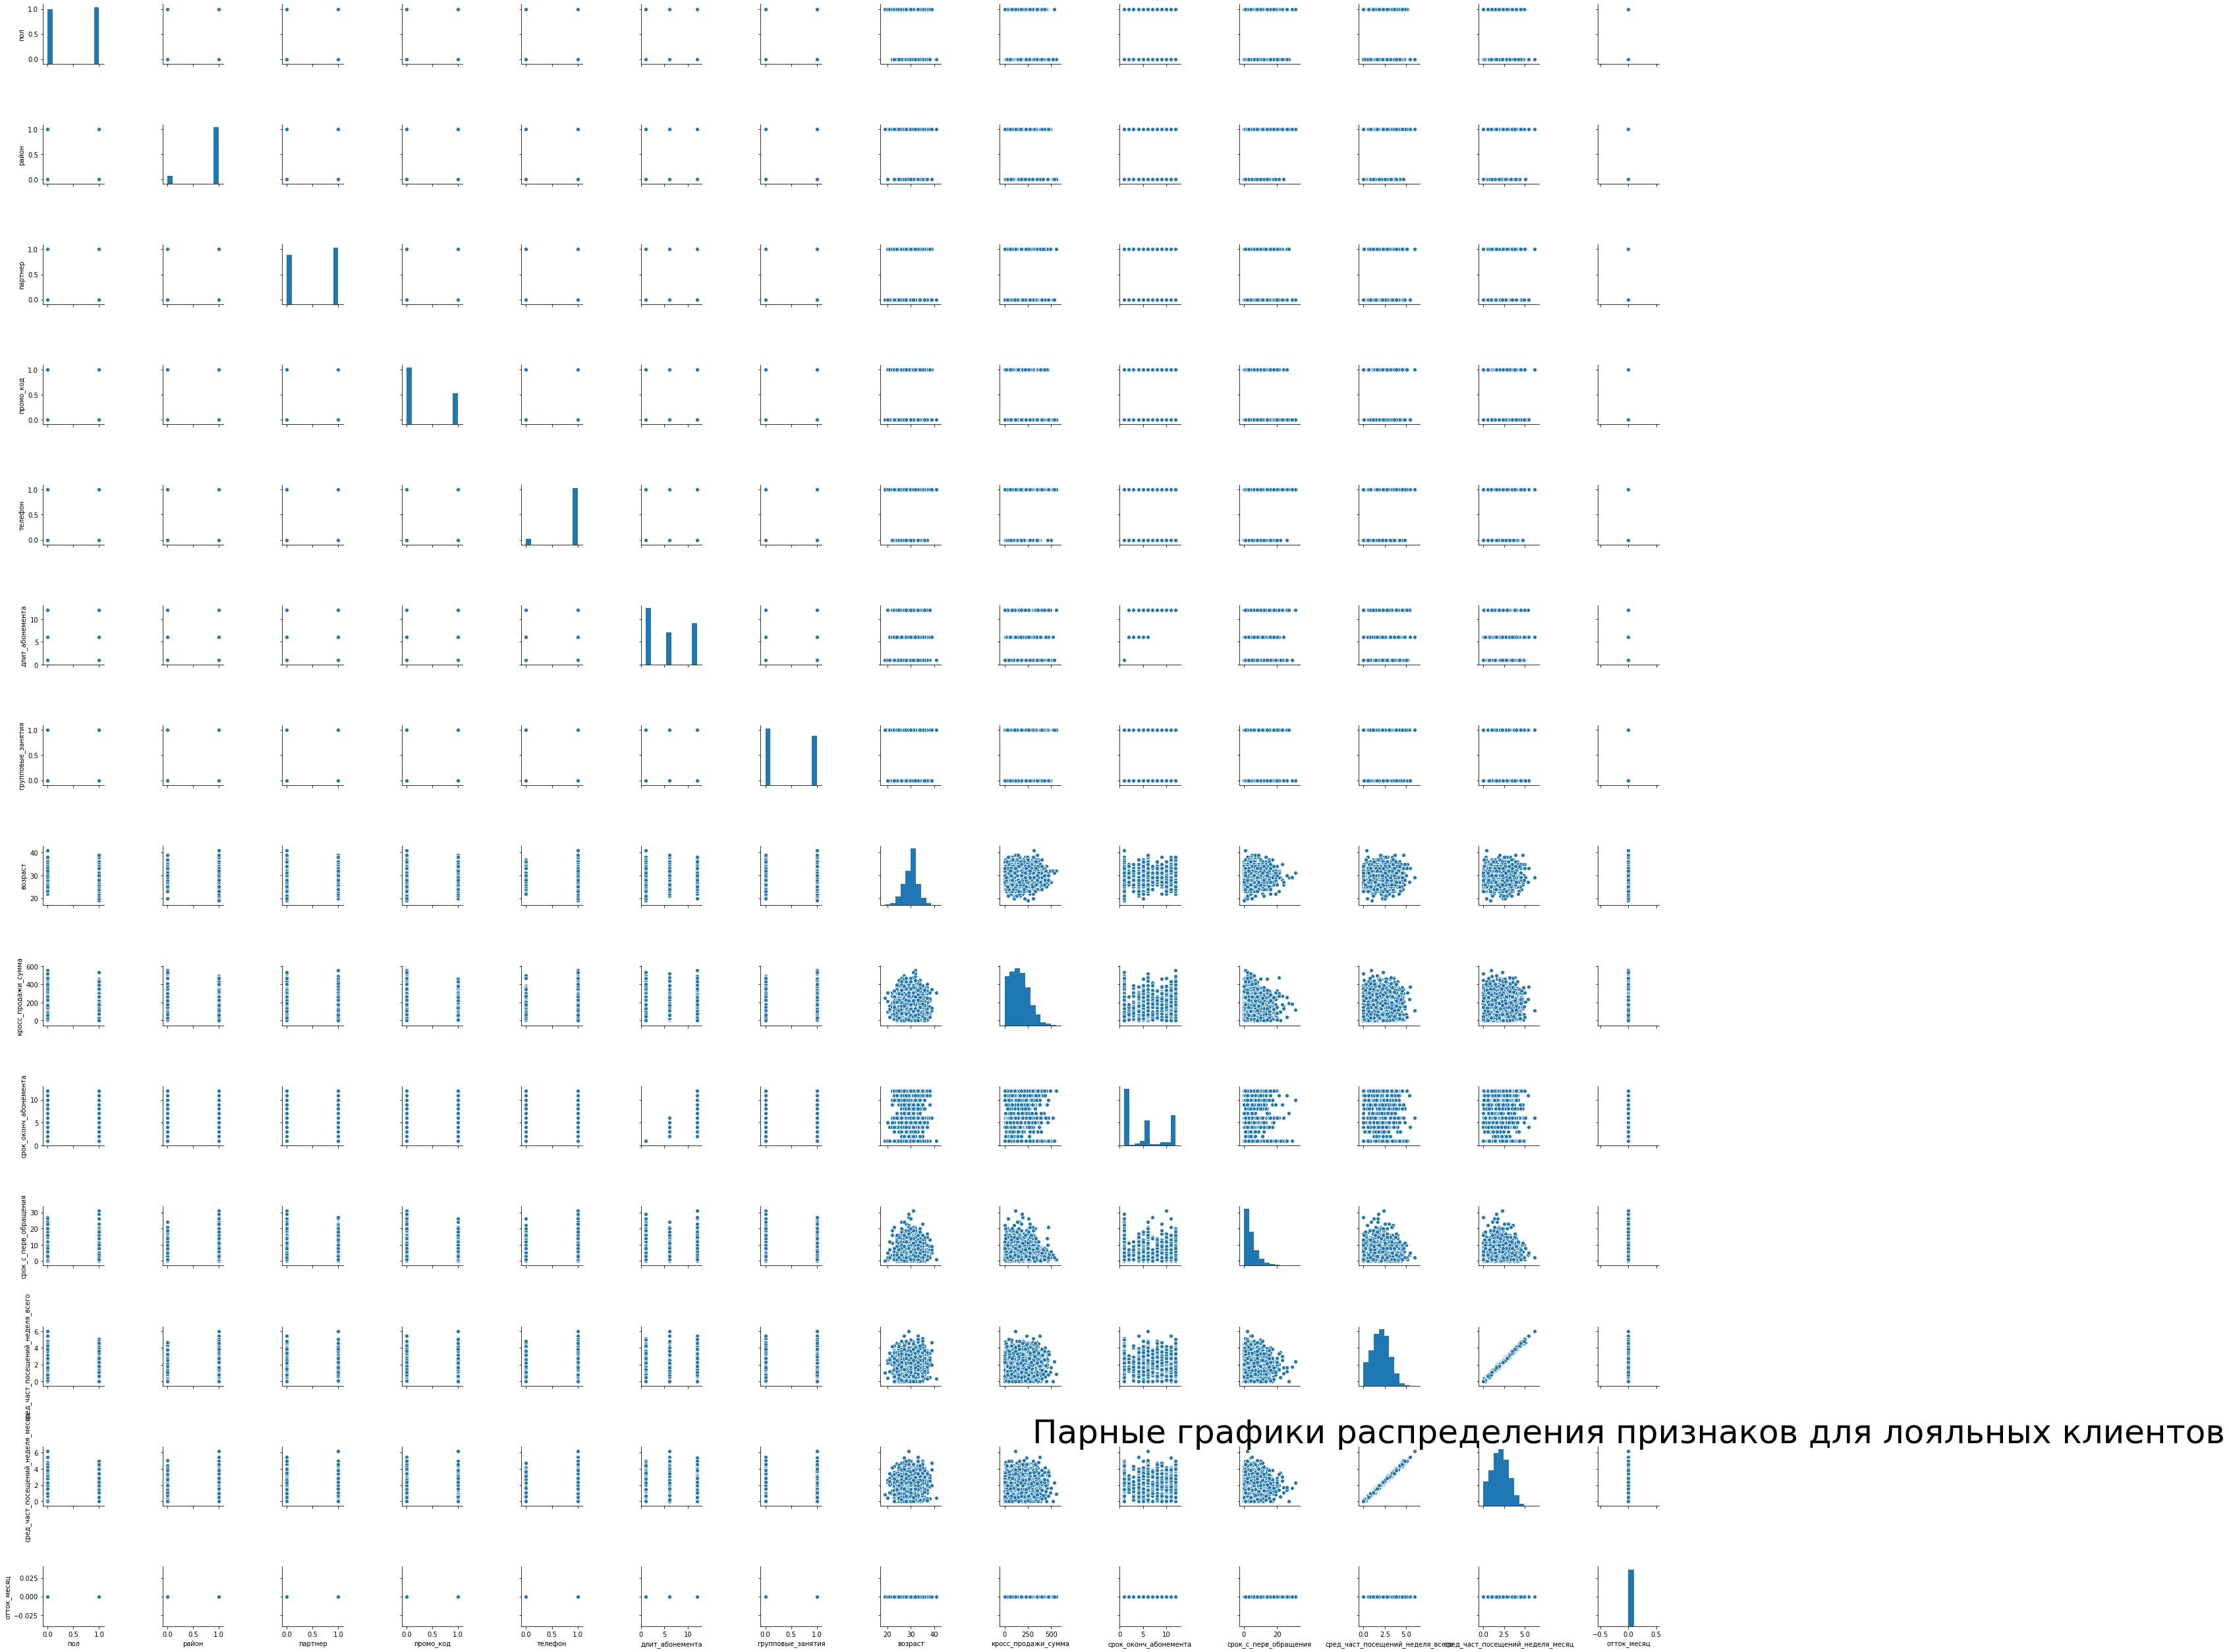

In [23]:
sns.pairplot(data_loyal)
plt.title('Парные графики распределения признаков для лояльных клиентов', fontsize = 50);

Гистограмма распределения признаков для ушедших (не лояльных) клиентов:  

In [24]:
data_no_loyal = data[data['отток_месяц'] == 1]
display(data_no_loyal.head(3))

,пол,район,партнер,промо_код,телефон,длит_абонемента,групповые_занятия,возраст,кросс_продажи_сумма,срок_оконч_абонемента,срок_с_перв_обращения,сред_част_посещений_неделя_всего,сред_част_посещений_неделя_месяц,отток_месяц
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
11,1,1,1,0,1,1,0,27,266.783824,1.0,2,2.348535,1.584316,1
13,1,1,0,0,1,1,1,27,152.748668,1.0,1,0.000000,0.000000,1


Парные графики распределения признаков для не лояльных клиентов:  

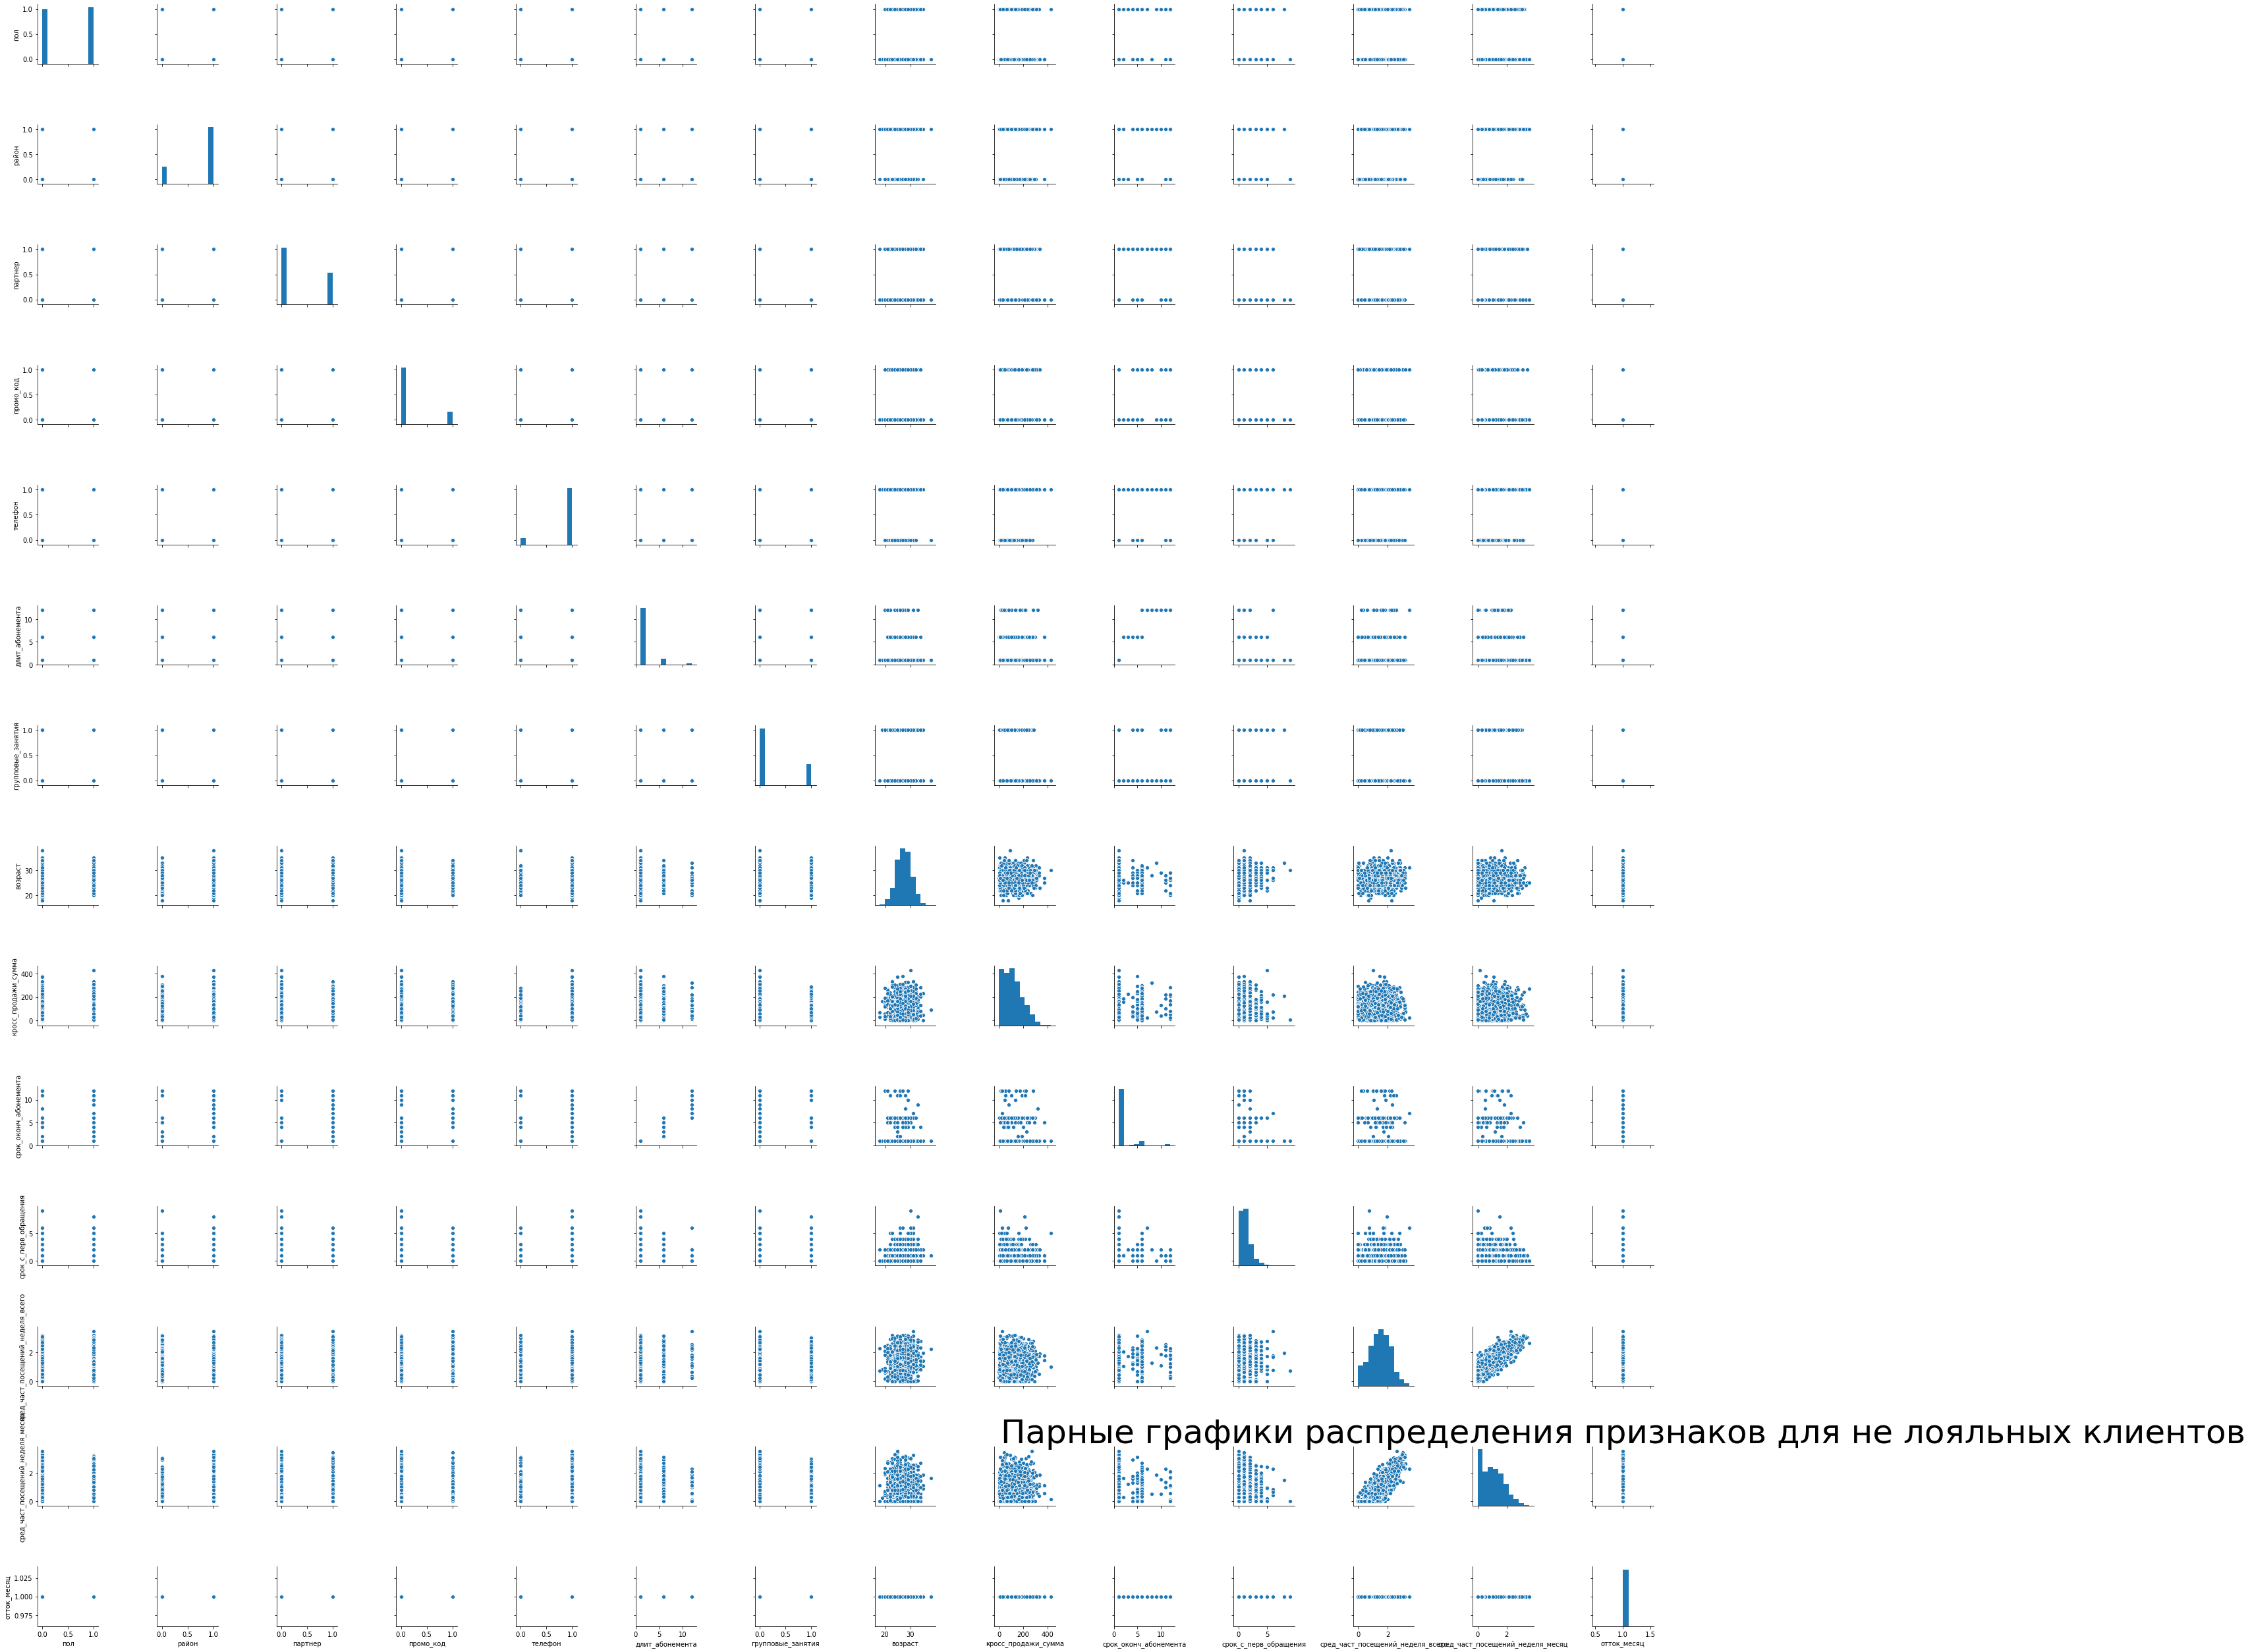

In [25]:
sns.pairplot(data_no_loyal)
plt.title('Парные графики распределения признаков для не лояльных клиентов', fontsize = 50);

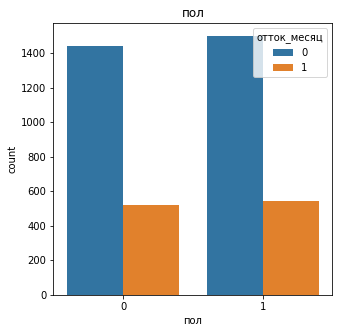

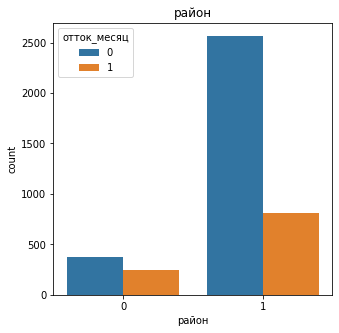

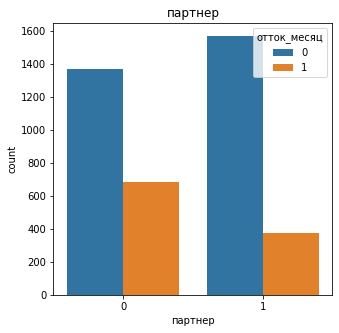

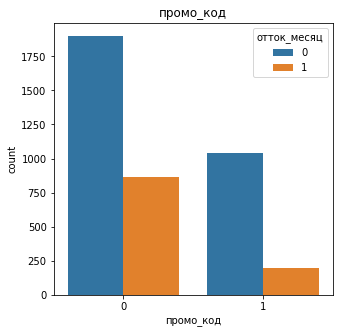

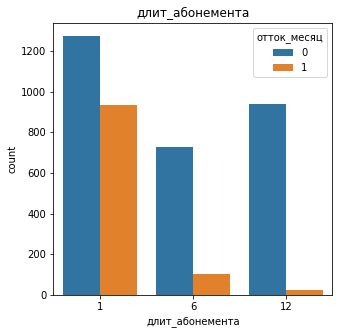

In [26]:
for column in ['пол', 'район', 'партнер', 'промо_код', 'длит_абонемента']:
    plt.figure(figsize=(5, 5))
    sns.countplot(x = data[column], hue='отток_месяц', data = data)
    plt.title(column)
    plt.show();

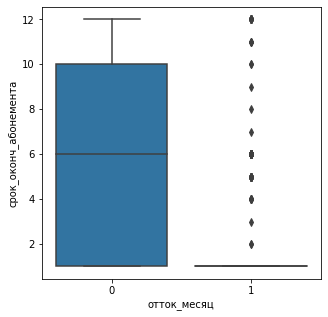

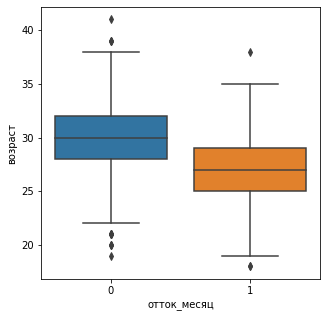

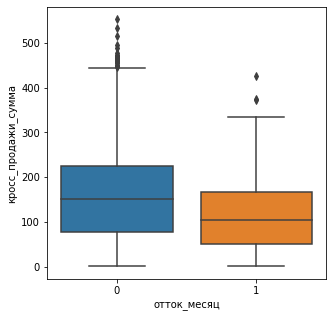

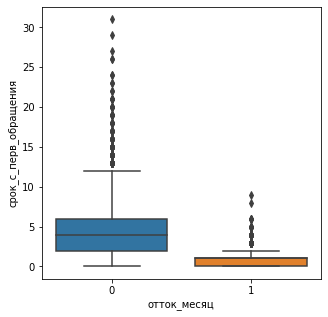

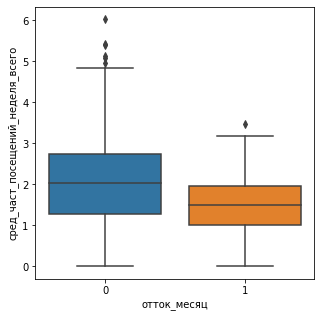

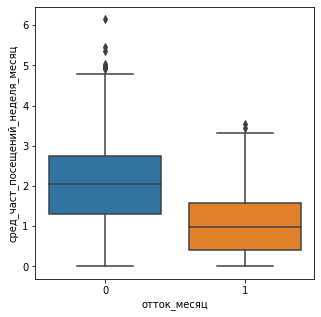

In [27]:
for column in ['срок_оконч_абонемента', 'возраст', 'кросс_продажи_сумма', 'срок_с_перв_обращения', 'сред_част_посещений_неделя_всего', 'сред_част_посещений_неделя_месяц']:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x = 'отток_месяц', y = data[column], data = data)
    plt.show();

Построим и отобразим матрицу корреляций:    

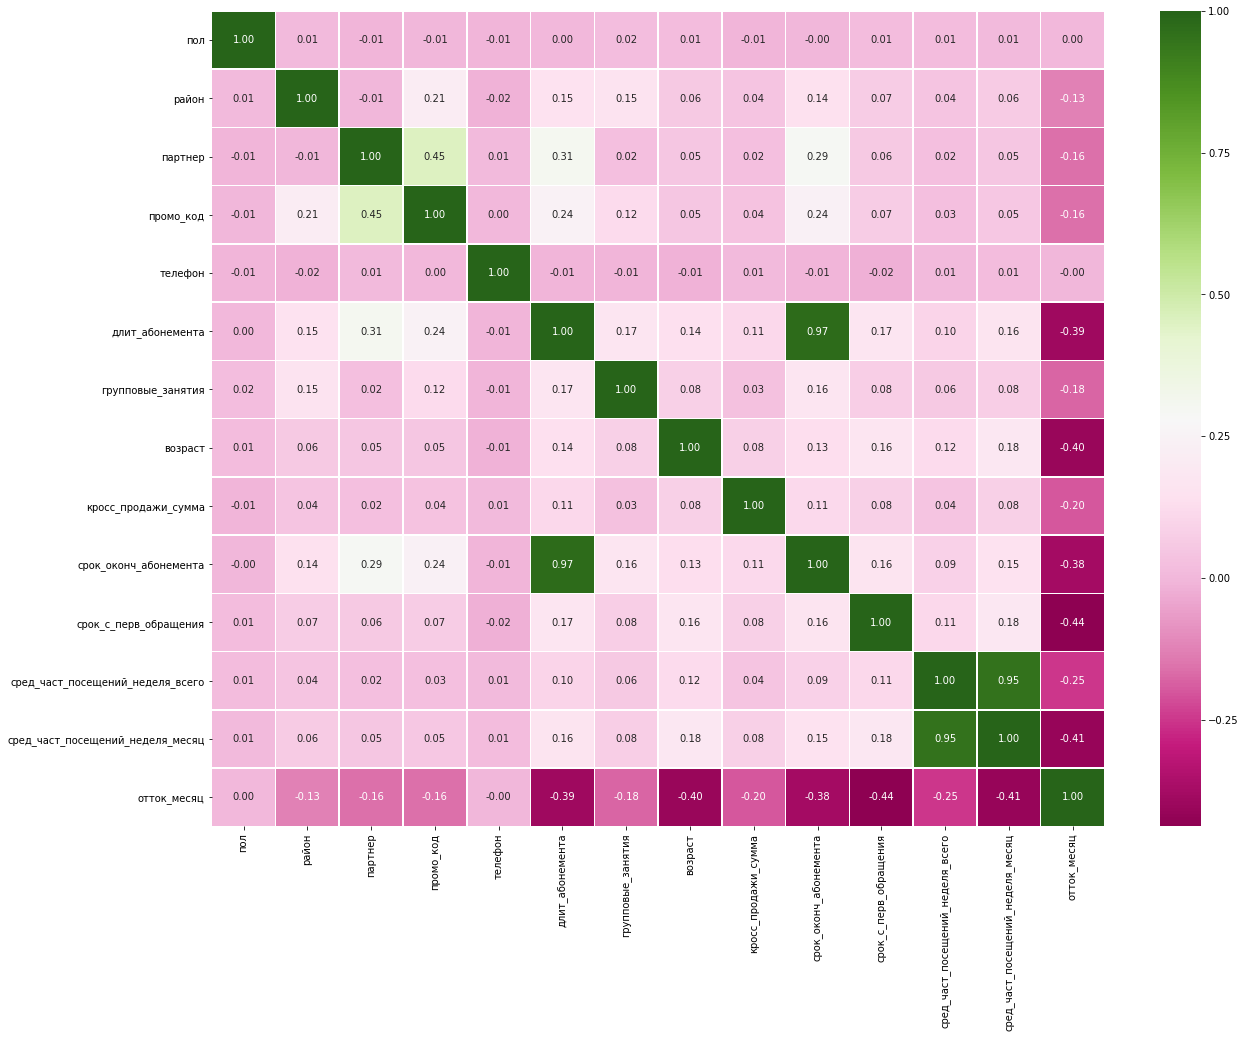

In [28]:
cm = data.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(cm, annot = True, fmt = '0.2f', linewidths=.5, cmap="PiYG")
plt.show()

Выводы по графикам:  

Лояльные клиенты фитнес-центра имеют следующие характеристики:

- живут рядом и пришли по промокоду, являются сотрудниками компании - партнера, вероятно имеют корпоративные скидки, склоны покупать длительный абонемент, посещают занятия, регулярно, ходят на групповые занятия, готовы тратить небольшие суммы на дополнительные услуги.

Дополнительный вывод - обнаружились мультиколлинеарные признаки: длительность текущего действующего абонемента - срок до окончания текущего действующего абонемента, а также средниче частоты посещений.  
Обнаружились, также, признаки с нулевой корреляцией с целевой переменной: телефон, пол.  

<a id="start7"></a>
# 3. Построим модель прогнозирования оттока пользователей:

In [29]:
# определим функцию, которая будет выводить наши метрики
def print_all_metrics(y_true, y_pred, y_proba, title = 'Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

In [30]:
# посмотрим, как соотносятся классы для нашего набора данных
data['отток_месяц'].value_counts()

0    2939
1    1061
Name: отток_месяц, dtype: int64

In [31]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = data.drop('отток_месяц', axis = 1)
y = data['отток_месяц']

In [32]:
# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [33]:
# обучим StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [34]:
# Преобразуем обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [35]:
# зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression()
# обучим модель
lr_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]
# выведем все метрики
print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Метрики для модели логистической регрессии:')

Метрики для модели логистической регрессии:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83


In [36]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
# обучим модель случайного леса
rf_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st) 
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]
# выведем все метрики
print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Метрики для модели случайного леса:')

Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81


Вывод - в нашем случае, лучше подходит модель логистической регрессии.  

<a id="start8"></a>
# 4. Кластеризацию пользователей:

In [37]:
# стандартизаруем данные, удаляем столбец с целевой переменной
sc = StandardScaler()
data_n_churn = data.drop('отток_месяц', axis=1)
x_sc = sc.fit_transform(data_n_churn)

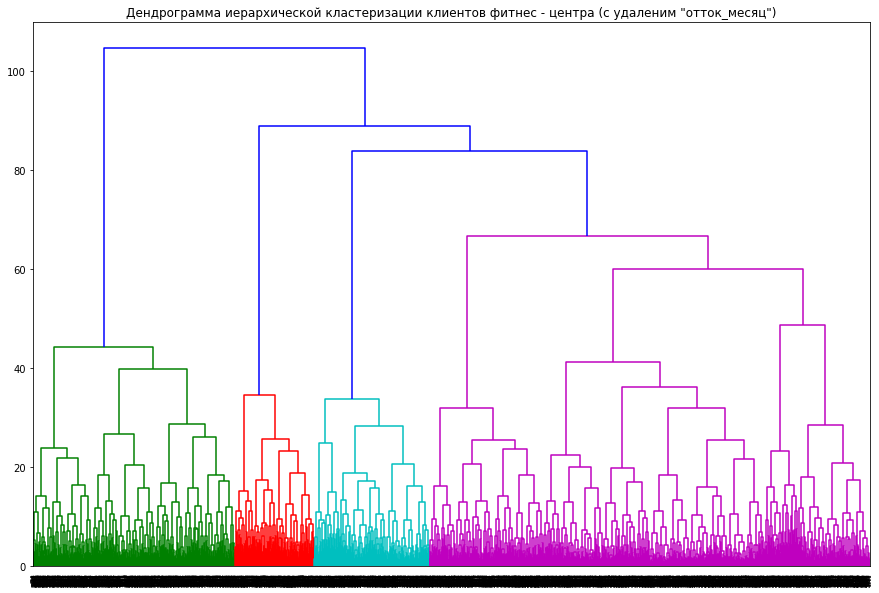

In [38]:
# строим дендрограмму 
plt.figure(figsize=(15,10))
linked = linkage(x_sc, method='ward')
dendrogram(linked, orientation='top')
plt.title('Дендрограмма иерархической кластеризации клиентов фитнес - центра (с удаленим "отток_месяц")')
plt.show()

Дендрограмма построенная с удалением столбца с показателем оттока (отток) дает 4 кластера, причем 4-й кластер выглядит довольно большим, попробуем построить без удаления «отток»:  

Обучим модель алгоритмом K-Means  

In [39]:
# стандартизируем данные, обучаем модель
sc_km = StandardScaler()
x_sc_km = sc_km.fit_transform(data_n_churn) ### ошибка ### UPD: все ок
# строим прогноз
km = KMeans(n_clusters=4, random_state=0)
labels = km.fit_predict(x_sc_km)
# добавляем столбец с кластерами и группируем по кластерам, находим среднее
data['cluster_km'] = labels
clusters_grouped = data.groupby('cluster_km').mean()

In [40]:
data.head()

,пол,район,партнер,промо_код,телефон,длит_абонемента,групповые_занятия,возраст,кросс_продажи_сумма,срок_оконч_абонемента,срок_с_перв_обращения,сред_част_посещений_неделя_всего,сред_част_посещений_неделя_месяц,отток_месяц,cluster_km
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,3
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,1
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,3
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,1


In [41]:
clusters_grouped_new = clusters_grouped.transpose()
clusters_grouped_new.columns = ['cluster_1', 'cluster_2', 'cluster_3', 'cluster_4']
clusters_grouped_new # несмотря на установленный random_state=0, кластеры все равно поменялись местами

,cluster_1,cluster_2,cluster_3,cluster_4
пол,0.523316,0.486815,0.544939,0.503711
район,0.862694,0.759297,0.861873,0.940631
партнер,0.471503,0.381339,0.343425,0.777365
промо_код,0.305699,0.190669,0.205298,0.572356
телефон,0.000000,1.000000,1.000000,1.000000
длит_абонемента,4.777202,1.899256,2.403027,10.697588
групповые_занятия,0.427461,0.292765,0.447493,0.536178
возраст,29.297927,28.048005,29.989593,29.912801
кросс_продажи_сумма,144.208179,129.704525,157.358764,161.363032
срок_оконч_абонемента,4.466321,1.805274,2.239357,9.768089


Из таблицы видно, что:  

К оттоку склонны клиенты из 1 и 2 кластеров, соответственно, клиенты из 3 и 4 кластеров, лояльные.  

Заметно, что клиенты лояльных кластеров:  

- чаще, значительно, посещают занятия,  
- ходят давно,  
- немного старше,  
- посещают групповые занятия,  
- проживают в непосредственной близости от фитнес - центра.    

Построим распределения признаков для кластеров:  

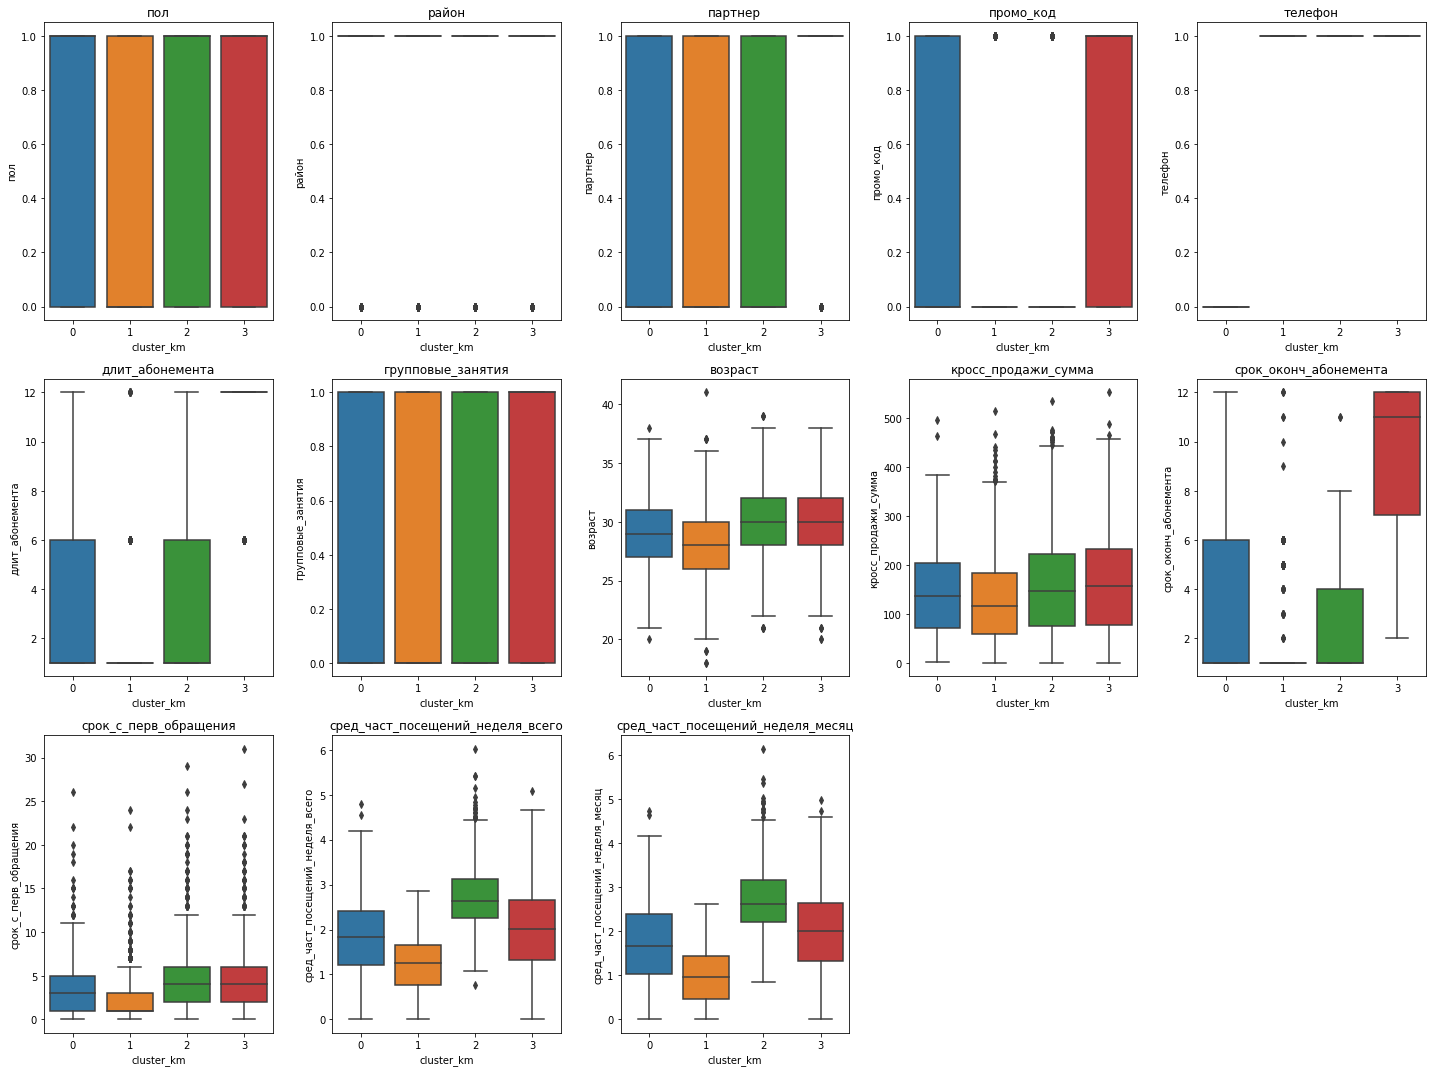

In [42]:
plt.subplots(figsize=(20, 15))
plots_in_rom = 5
non_binary_vars = ['пол', 'район',  'партнер', 'промо_код', 'телефон', 'длит_абонемента', 'групповые_занятия', 'возраст', 'кросс_продажи_сумма', 'срок_оконч_абонемента', 'срок_с_перв_обращения', 'сред_част_посещений_неделя_всего', 'сред_част_посещений_неделя_месяц', 'отток_месяц']
for i, col in enumerate(data_n_churn.columns.values):
    ax = plt.subplot(len(data_n_churn.columns.values)//plots_in_row + 1, plots_in_row, i + 1)
    if col in non_binary_vars:
        sns.boxplot(data = data, x = 'cluster_km', y = col, ax = ax)
    else:
        sns.barplot(data = data, x = 'cluster_km', y = col, ax = ax)
    plt.title(col)
plt.tight_layout()
plt.show()

Построим гистограммы для категориальных данных:  

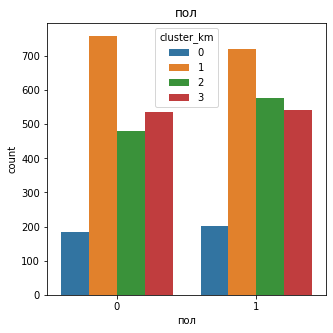

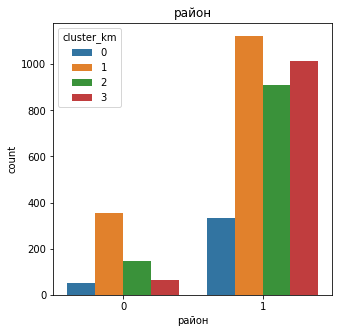

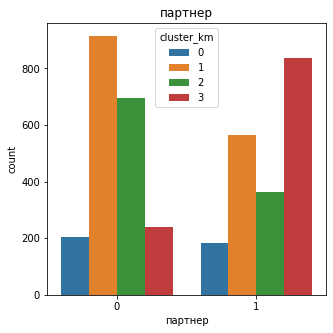

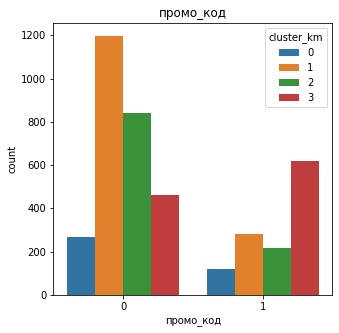

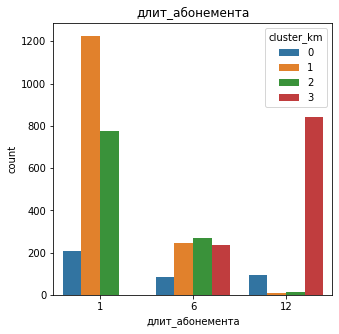

In [43]:
for column in ['пол', 'район', 'партнер', 'промо_код', 'длит_абонемента']:
    plt.figure(figsize=(5, 5))
    sns.countplot(x = data[column], hue='cluster_km', data = data)
    plt.title(column)
    plt.show();

In [44]:
data.cluster_km.value_counts()

1    1479
3    1078
2    1057
0    386 
Name: cluster_km, dtype: int64

In [45]:
data.groupby('cluster_km').mean().T

cluster_km,0,1,2,3
пол,0.523316,0.486815,0.544939,0.503711
район,0.862694,0.759297,0.861873,0.940631
партнер,0.471503,0.381339,0.343425,0.777365
промо_код,0.305699,0.190669,0.205298,0.572356
телефон,0.000000,1.000000,1.000000,1.000000
длит_абонемента,4.777202,1.899256,2.403027,10.697588
групповые_занятия,0.427461,0.292765,0.447493,0.536178
возраст,29.297927,28.048005,29.989593,29.912801
кросс_продажи_сумма,144.208179,129.704525,157.358764,161.363032
срок_оконч_абонемента,4.466321,1.805274,2.239357,9.768089


Выводы:  

Как выяснилось, количество клиентов по каждом кластере разное.  
Наибольший отток в кластере 0 и 1.  

<a id="start9"></a>
# 5. Выводы и базовые рекомендации по работе с клиентами:

Сделать акцент на привлечение новых клиентов по промокоду,  

Реклама клуба в районе его расположения - баннеры, раздача листовок, плакаты на подъездах,  

Стимуляция участия в групповых занятиях,  

Увеличить активность привлечения компаний - партнеров.  